# Spatial Distribution of Geochemistry of Off-Axis Seamounts
- Notebook 1
#### By: Molly Anderson

#### We use geochemical data collected from ~300 basalt samples from a seamount chain near the East Pacific Rise which might provide insight into mantle dynamics near mid-ocean ridge axes, where much of earth's crust is created. The data include major elements (those with > 1 wt % concentration in the basalt) and trace elements (<1 wt %). These are in csv format from Excel, and the rows represent a sample, and each column represents a measured concentration of a given element. The ultimate objective of this study is to understand mantle dynamics by examining the composition of basalts that have been erupted away from axis, which might tell us how heterogeneous the mantle is and why. For this notebook, I manage the data by looking at the statistical importance of minimum, maximum, and average values of analyzed elements and element ratios, and then calculate and display correlation coefficients that might indicate whether there is a spatial relationship between the chemical composition of each seamount with distance from axis, with height on a seamount, and with distance between samples.

### I. Import relevant libraries
*Need to bring in a dataset (using pandas), calculate statistics and values from it (numpy), plot visual representations of the data (matplotlib.pyplot)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

### II. Read in text and numerical data
- Load in data csv file and assign it the variable "Elements" since it contains major and trace elements in a single table
- I used the read_csv pandas command because I have already formatted my data after data crunch into a csv for manageability. I did this because I have found that for programs like R and Matlab, having a clean .csv works best given I use text and numerical data. Also if I want to import the data into my mapping program, it is an easy switch to .txt. I could also have used the command Open() and selected the mode 'r' for 'read' but since it is already a readable csv I chose to use read_csv
- Note: the data have been manipulated in R Studio, in which I created new columns that labeled or categorized each sample based on its chemistry. For example, those with a given Dive.Dredge.Sample range, they are named a certain "Feature". LavaType was also created, but as a function of the LaSmN ratio and KTi ratio (importance of these is described below)

In [2]:
Elements = pd.read_csv('Documents/EPR/Code/MajorTrace.csv') #read in csv file using specific directory
print(Elements) #shows table in raw form, but skips rows and columns

    Dive.Dredge.Sample LavaType       Feature      Type  Shape   Lab  \
0               OS13_E    DMORB  Midway Ridge     Ridge      0    UF   
1               OS13_H    DMORB  Midway Ridge     Ridge      0    UF   
2               OS13_C    DMORB  Midway Ridge     Ridge      0    UF   
3               OS13_D    DMORB  Midway Ridge     Ridge      0    UF   
4              4852_14    DMORB         Coral     Ridge     15    UF   
5               4857-8    DMORB    Otto Ridge     Ridge     15    UF   
6              4847-2     DMORB           Max      Cone     18  USGS   
7              4847-8     DMORB           Max  Seamount     17  USGS   
8               4852_7    DMORB         Coral     Ridge     15    UF   
9               4857-7    DMORB    Otto Ridge     Ridge     15    UF   
10             4852_15    NMORB         Coral     Ridge     15    UF   
11             4852_12    NMORB         Coral     Ridge     15    UF   
12              4852_8    NMORB         Coral     Ridge     15  

### Calculate some important statistics and assign them variable names and confirm data are what is expected
- Check size of Elements and KTi... KTi should have 148 samples (rows) and be only one column whereas Elements should be the full dataset of 148 samples each with 75 geochemical signatures
- KTi is used as a major element proxy for melting and source variability
- LaSm is used as a trace element proxy for melting and source variability (thus should correlate well with KTi)
- NbLa is used to parse out source from melting by eliminating the effects of melting (should look different from LaSm and KTi because melting effects are removed
- Labelled and printed out values for each statistic

In [3]:
KTi = Elements['K2O.TiO2'].values #take all values for a given column and read that as a separate entity for calculating stats
KTi.shape
print('Shape of Elements = ', Elements.shape)
print('Shape of KTi = ', KTi.shape)
LaSm = Elements['La.SmN'].values
NbLa = Elements['Nb.La'].values
print('Max KTi = ', np.max(KTi)) #print results of statistics on each selected column
print('Min KTi = ', np.min(KTi))
print('Max La/SmN', np.max(LaSm))
print('Min La/SmN', np.min(LaSm))
print('Average La/SmN', np.mean(LaSm)) 
print('Average K/Ti', np.mean(KTi)) #this statistic tells me that more of the samples are lower KTi (or more depleted)

Shape of Elements =  (148, 75)
Shape of KTi =  (148,)
Max KTi =  61.31
Min KTi =  4.98
Max La/SmN 2.810123656
Min La/SmN 0.525969859
Average La/SmN 1.3906417132770272
Average K/Ti 23.68364864864865


### Determine how well correlated are the melt/source proxies K/Ti and La/SmN
- Plot KTi vs LaSm to visually assess if they are positively correlated
- If they are positively correlated that means we can safely use both of these ratios to answer how variable the magmas are just based on extents of melting and source variability
- How well they are correlated is determined using a correlation coefficient. The closer the correlation coefficient is to 1, the better the correlation, and the more reliably we can use these two interchangeably as proxies for extent of mantle melting that formed a lava

Correlation Coefficient for K/Ti and La/SmN:
0.9870694686080014


Text(5,2.5,'Corr Coeff = 0.987')

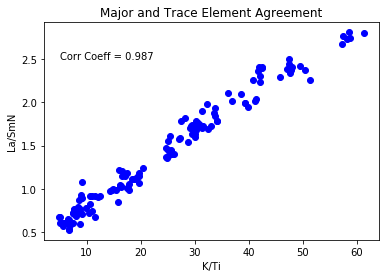

In [4]:
print('Correlation Coefficient for K/Ti and La/SmN:')
print(Elements['K2O.TiO2'].corr(Elements['La.SmN']))
plt.plot(KTi, LaSm, 'bo')
plt.title('Major and Trace Element Agreement')
plt.xlabel('K/Ti')
plt.ylabel('La/SmN')
plt.text(5,2.5, 'Corr Coeff = 0.987')

### Calculate correlation coefficients between values in the data table "Elements" 
This is helpful later for a search for any correlations between things like longitude or depth and chemistry

Create a matrix of correlation coefficients between all columns

In [5]:
correlations = Elements.corr() #calculate correlation coefficients between all columns in the data table "Elements"
print(correlations)

               Shape  Latitude  Longitude     Depth      SiO2      TiO2  \
Shape       1.000000 -0.358157   0.094345 -0.398119 -0.012987  0.196650   
Latitude   -0.358157  1.000000  -0.511967 -0.004720  0.197475 -0.082739   
Longitude   0.094345 -0.511967   1.000000 -0.043370 -0.421752 -0.109682   
Depth      -0.398119 -0.004720  -0.043370  1.000000  0.134597  0.131916   
SiO2       -0.012987  0.197475  -0.421752  0.134597  1.000000  0.405870   
TiO2        0.196650 -0.082739  -0.109682  0.131916  0.405870  1.000000   
Al2O3       0.017613 -0.256479   0.526693 -0.042039 -0.729634 -0.284857   
FeO         0.203015 -0.031885  -0.051267 -0.296994 -0.160606 -0.169650   
MnO         0.017412  0.114851  -0.220098 -0.218559 -0.040313 -0.279580   
MgO        -0.198217  0.072877   0.177306 -0.058065 -0.538468 -0.918396   
CaO        -0.317852  0.265892  -0.170645  0.015511 -0.048138 -0.784153   
Na2O        0.209939 -0.132913  -0.063936  0.129769  0.262112  0.872540   
K2O         0.204570 -0.0

### Calculate correlation coefficients between Depth and La/SmN
To determine if melting changes systematically with depth of the sample (for all samples)

**Note I could have used the previous table of correlation coefficients and just selected values from there but I wanted to make sure I could perform the correlation between two columns myself

Correlation Coefficient for La/SmN with Depth:
0.13846350690376602


Text(0.5,3200,'Corr Coeff = 0.138')

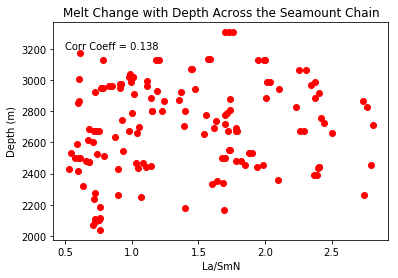

In [6]:
print('Correlation Coefficient for La/SmN with Depth:')
print(Elements['Depth'].corr(Elements['La.SmN']))
Dep = Elements['Depth'].values
plt.plot(LaSm, Dep, 'ro')
plt.title('Melt Change with Depth Across the Seamount Chain')
plt.xlabel('La/SmN')
plt.ylabel('Depth (m)')
plt.text(0.5,3200, 'Corr Coeff = 0.138')

#### The correlation coefficient is far from 1, so La/SmN does not change systematically with depth (height on seamount) on a large scale (across the entire dataset and chain of seamounts)

### Subsample a single seamount's chemistry and depth correlation
Lithospheric isostasy can impact the generalized use of "depth" across the seamount chain, so using the full set of data would bias sampling based on volumes of material erupted. To eliminate the effect of isostasy, we use one seamount at a time and look at the relative depth of only the samples on that seamount. I use Coral seamount first since it has a variety of compositions at a wide range of depths

Correlation Coefficient for La/SmN with Depth on Coral:
0.4309596771732887


Text(1.4,2200,'Corr Coeff = 0.431')

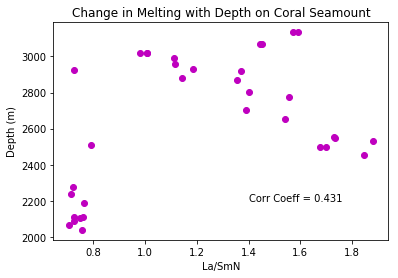

In [7]:
Coral = Elements.loc[Elements['Feature'] == 'Coral']
print('Correlation Coefficient for La/SmN with Depth on Coral:')
print(Coral['Depth'].corr(Coral['La.SmN']))
LaSm = Coral['La.SmN'].values
Dep = Coral['Depth'].values
plt.plot(LaSm, Dep, 'mo')
plt.title('Change in Melting with Depth on Coral Seamount')
plt.xlabel('La/SmN')
plt.ylabel('Depth (m)')
plt.text(1.4,2200, 'Corr Coeff = 0.431')

#### Correlation increases for a given seamount, but is still unconvincing as a direct correlation between melting and height on the seamount
we have removed the effects of lithostatic adjustment and still see no correlation between melting and height on the seamount

**This means that there is likely some other process controlling the chemical distribution along the seamounts, or a combination of melting plus some other factor